a) Do some initial EDA on this dataset. For example checking null values, look at some statistical properties.

In [15]:
import pandas as pd

file_path = "../data/supahcoolsoft.csv"
df = pd.read_csv(file_path)

null_values = df.isnull().sum()

statistics = df.describe()

data_types = df.dtypes

data_info = df.info()
# Display the results
print("Null Values in Each Column:\n", null_values)
print("\nStatistical Summary:\n", statistics)
print("\nData Types:\n", data_types)
print("\nData Info:\n", data_info)


KeyError: 'Mean'

<Figure size 1200x800 with 0 Axes>

In [3]:
df["Position"]

0              AI Specialist
1     Database Administrator
2             Data Scientist
3      Junior Data Scientist
4      Junior Data Scientist
               ...          
95      Junior Data Engineer
96              BI Developer
97      Senior Data Engineer
98       Senior Data Analyst
99    Database Administrator
Name: Position, Length: 100, dtype: object

In [4]:
df["Department"]

0     Product Management
1            Engineering
2                 DevOps
3     Product Management
4     Product Management
             ...        
95          Data Science
96           Engineering
97           Engineering
98    Product Management
99    Product Management
Name: Department, Length: 100, dtype: object

b) See if there are some null values that you can fill in based on your domain knowledge within the data field.

In [5]:
null_values = df.isnull().sum()
print("Null Values in Each Column:\n", null_values)

fillnadepartment = df['Department'].mode()[0]
fillnaposition = df['Position'].mode()[0]
fillnasalary = df['Salary_SEK'].median()


df['Department'].fillna(value=fillnadepartment)
df['Position'].fillna(value=fillnaposition)
df['Salary_SEK'].fillna(value=fillnasalary)

null_values_after = df.isnull().sum()
print("\nNull Values After Filling:\n", null_values_after)


Null Values in Each Column:
 EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64

Null Values After Filling:
 EmployeeID     0
FirstName      0
LastName       0
Age            0
Department     2
Position       1
Salary_SEK     1
Email          0
PhoneNumber    0
dtype: int64


c) Find out some statistical information about the salary, e.g. mean, median, min, max, 10 percentile and 90 percentile.

In [6]:
df['Salary_SEK'].fillna(df['Salary_SEK'].median())
    
mean_salary = df['Salary_SEK'].mean()
median_salary = df['Salary_SEK'].median()
min_salary = df['Salary_SEK'].min()
max_salary = df['Salary_SEK'].max()
percentile_10 = df['Salary_SEK'].quantile(0.10)
percentile_90 = df['Salary_SEK'].quantile(0.90)

print("Salary Statistics:")
print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")
print(f"Min Salary: {min_salary:.2f}")
print(f"Max Salary: {max_salary:.2f}")
print(f"10th Percentile: {percentile_10:.2f}")
print(f"90th Percentile: {percentile_90:.2f}")


Salary Statistics:
Mean Salary: 52049.18
Median Salary: 52919.00
Min Salary: 30452.00
Max Salary: 69742.00
10th Percentile: 36541.60
90th Percentile: 67029.40


  d) Group by different roles and take the median and average salaries for each group.

In [12]:
roles_salary = df.groupby("Position")["Salary_SEK"].agg(["median", "mean"])


print(roles_salary)

                            median          mean
Position                                        
AI Specialist              62760.5  62246.000000
BI Developer               48608.5  48276.000000
Big Data Engineer          57958.0  57958.000000
Data Architect             60572.0  59525.600000
Data Scientist             51919.0  51722.333333
Database Administrator     48482.0  47706.800000
ETL Developer              44192.0  45239.111111
Junior Data Analyst        34877.5  35195.300000
Junior Data Engineer       41905.0  40000.200000
Junior Data Scientist      43595.5  43813.125000
Machine Learning Engineer  51806.0  53161.875000
Senior Data Analyst        57114.5  58586.800000
Senior Data Engineer       65740.0  64918.750000
Senior Data Scientist      65526.0  64451.857143


  e) Group by different departments and take the median and average salaries for each group.

In [8]:
department_salary = df.groupby("Department")["Salary_SEK"].agg(["median", "mean"])


print(department_salary)

                     median          mean
Department                               
Data Science        47256.5  50978.625000
DevOps              48503.0  51043.000000
Engineering         48507.5  48424.600000
IT                  53193.0  53585.062500
Product Management  53772.0  54871.769231


  f) Graph different data engineers salary. There are many approaches to graph this, try different and reason about pros and cons of each you choose.

In [18]:
df.head()

,EmployeeID,FirstName,LastName,Age,Department,Position,Salary_SEK,Email,PhoneNumber
0,E001,Ann,Larsson,41,Product Management,AI Specialist,60777.0,ann.larsson@supacoolsoft.se,+46 (0)25 37 22 30
1,E002,Emma,Kim,52,Engineering,Database Administrator,46020.0,emma.kim@supacoolsoft.se,+46 (0)855 449 66
2,E003,Barbro,Andersson,59,DevOps,Data Scientist,48503.0,barbro.andersson@supacoolsoft.se,+46 (0)47 61 73 44
3,E004,Magnus,Söderström,52,Product Management,Junior Data Scientist,47296.0,magnus.söderström@supacoolsoft.se,+46 (0)258 579 26
4,E005,Therese,Ljungberg,46,Product Management,Junior Data Scientist,42435.0,therese.ljungberg@supacoolsoft.se,+46 (0)575 495 24


In [25]:
import pandas as pd

# Load the data
file_path = "../data/supahcoolsoft.csv"
df = pd.read_csv(file_path)

# Set the position column as the index if it's not already
df = df.set_index('Position')

# Filter for specific positions
positions_of_interest = ['Big Data Engineer', 'Junior Data Engineer', 'Senior Data Engineer']
filtered_df = df.loc[df.index[df.index.isin(positions_of_interest)]]

# Check the filtered data
print(filtered_df)


                     EmployeeID FirstName   LastName  Age          Department  \
Position                                                                        
Junior Data Engineer       E010       Ove    Larsson   54        Data Science   
Junior Data Engineer       E011    Fatima       Khan   41              DevOps   
Junior Data Engineer       E018    Gustaf    Jönsson   50  Product Management   
Junior Data Engineer       E076       Mia      Patel   30        Data Science   
Junior Data Engineer       E096      Erik    Höglund   55        Data Science   
...                         ...       ...        ...  ...                 ...   
Senior Data Engineer       E055    Sophia   Martinez   39  Product Management   
Senior Data Engineer       E067       Gun  Jakobsson   60        Data Science   
Senior Data Engineer       E086    Olivia      Brown   53                  IT   
Senior Data Engineer       E089       Wei      Zhang   30              DevOps   
Senior Data Engineer       E

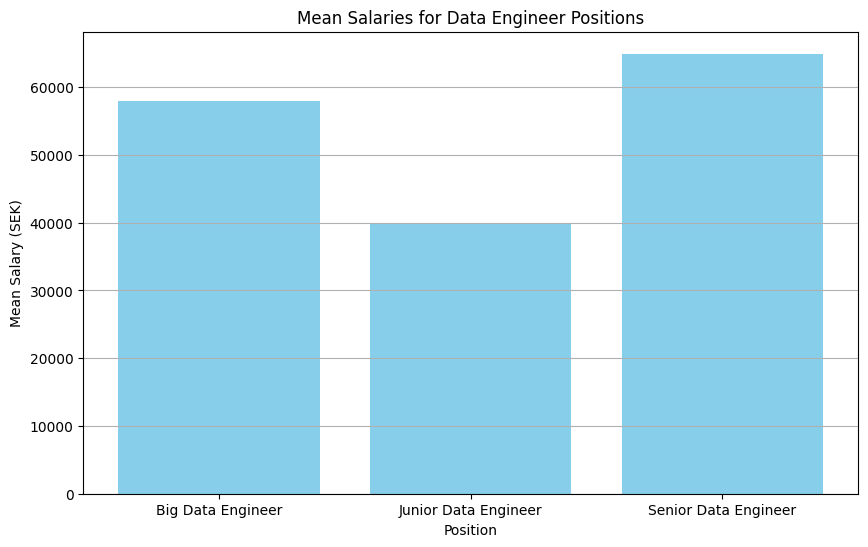

In [27]:
import matplotlib.pyplot as plt

# Filtered Data
positions_of_interest = ['Big Data Engineer', 'Junior Data Engineer', 'Senior Data Engineer']
filtered_df = df.loc[df.index[df.index.isin(positions_of_interest)]]

# Calculate mean salaries for the bar chart
mean_salaries = filtered_df.groupby('Position')['Salary_SEK'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_salaries.index, mean_salaries, color='skyblue')
plt.xlabel('Position')
plt.ylabel('Mean Salary (SEK)')
plt.title('Mean Salaries for Data Engineer Positions')
plt.grid(axis='y')
plt.show()


C:\Users\lager\AppData\Local\Temp\ipykernel_16748\2377675903.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=salary_data.index)


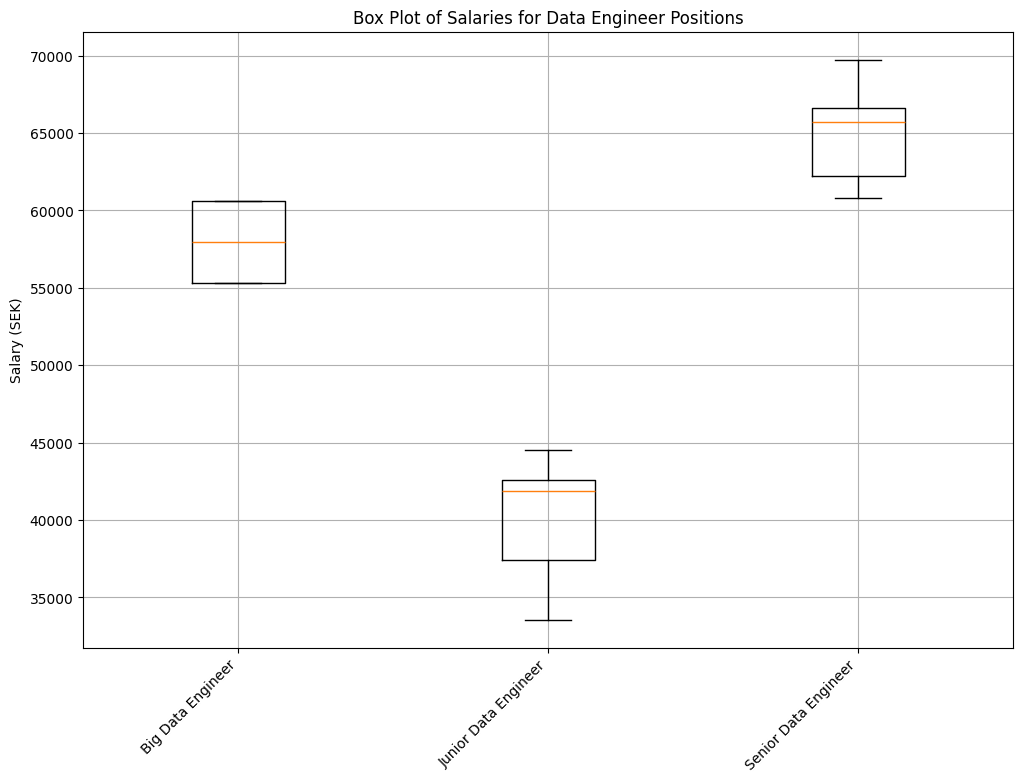

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregating salaries by position
salary_data = filtered_df.groupby('Position')['Salary_SEK'].apply(list)

# Prepare data for boxplot
data = [np.array(salaries) for salaries in salary_data]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=salary_data.index)
plt.ylabel('Salary (SEK)')
plt.title('Box Plot of Salaries for Data Engineer Positions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


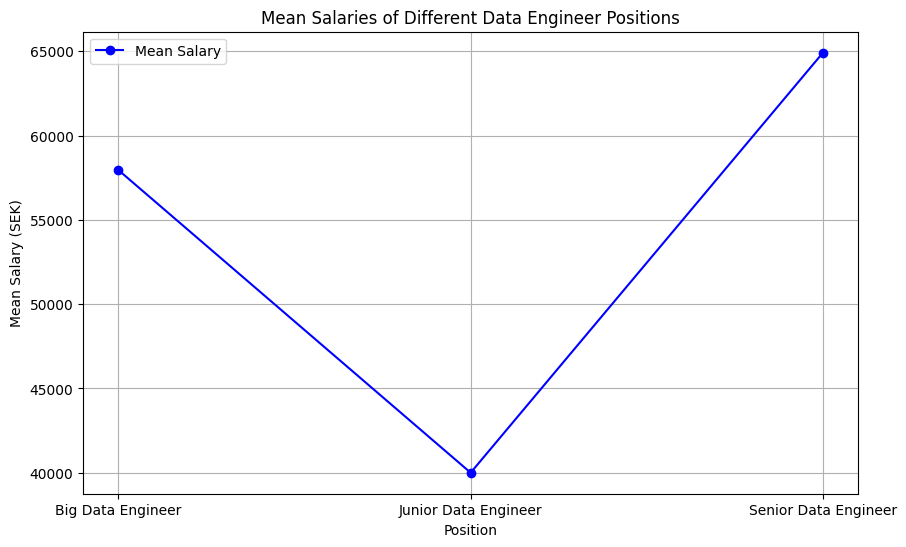

In [29]:
import matplotlib.pyplot as plt

# For a line chart, you might want to use mean values or a specific metric
mean_salaries = filtered_df.groupby('Position')['Salary_SEK'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_salaries.index, mean_salaries, marker='o', linestyle='-', color='b', label='Mean Salary')
plt.xlabel('Position')
plt.ylabel('Mean Salary (SEK)')
plt.title('Mean Salaries of Different Data Engineer Positions')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\lager\AppData\Local\Temp\ipykernel_16748\1819537989.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Position', y='Salary_SEK', data=violin_df, palette='muted')


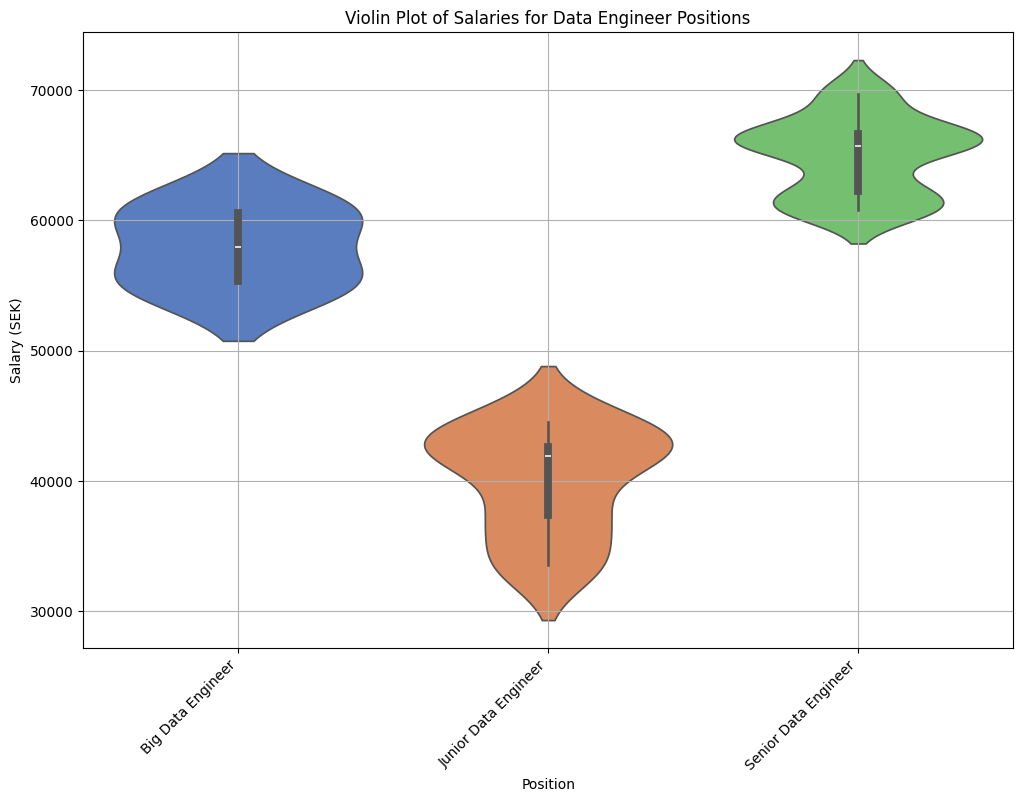

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for violin plot
# Flatten salary data and create a DataFrame for seaborn
salary_data = []
positions = []

for position, salaries in filtered_df.groupby('Position')['Salary_SEK']:
    salary_data.extend(salaries)
    positions.extend([position] * len(salaries))

violin_df = pd.DataFrame({'Position': positions, 'Salary_SEK': salary_data})

plt.figure(figsize=(12, 8))
sns.violinplot(x='Position', y='Salary_SEK', data=violin_df, palette='muted')
plt.xlabel('Position')
plt.ylabel('Salary (SEK)')
plt.title('Violin Plot of Salaries for Data Engineer Positions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()
